# Experiment 3: Sensitivity of Linear Regression to Outliers

## Research Question
How sensitive is linear regression to outliers, and does regularization improve robustness?

In this experiment, we analyze how a small number of extreme outliers affect the fitted regression line and prediction error.


In [1]:
import sys
import os

# Add project root to Python path
sys.path.append(os.path.abspath(".."))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("../results/exp3_results.csv")
df


,model,clean_mse,outlier_mse
0,Linear,0.806585,20.707275
1,Ridge,0.806628,20.707320


### Why Outliers Matter

Linear regression minimizes squared error, which disproportionately penalizes large deviations.
As a result, even a small number of extreme outliers can strongly influence the fitted model.

We first compare prediction error before and after injecting outliers.


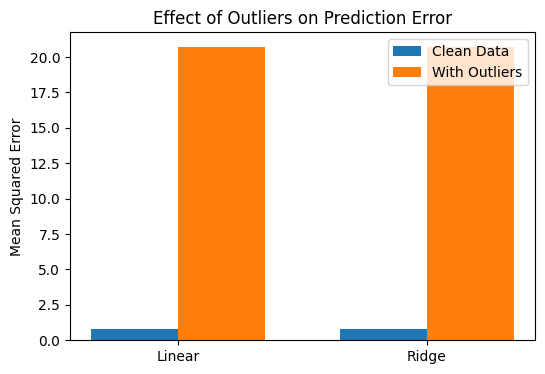

In [9]:
labels = df["model"]
clean = df["clean_mse"]
outliers = df["outlier_mse"]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(6,4))
plt.bar(x - width/2, clean, width, label="Clean Data")
plt.bar(x + width/2, outliers, width, label="With Outliers")

plt.xticks(x, labels)
plt.ylabel("Mean Squared Error")
plt.title("Effect of Outliers on Prediction Error")
plt.legend()
plt.savefig("../plots/exp3_mse.png", dpi=300, bbox_inches="tight")
plt.show()


### Interpretation: Prediction Error

The introduction of outliers significantly increases prediction error for linear regression.
This occurs because squared-error loss amplifies the influence of extreme deviations.

Ridge regression slightly reduces sensitivity by shrinking coefficients, but it does not fully eliminate the effect of outliers.


In [4]:
from src.data_generation import generate_linear, inject_outliers
from src.models import linear_model, ridge_model

X, y = generate_linear(seed=42)
X_out, y_out = inject_outliers(X, y)

models = {
    "Linear Regression": linear_model(),
    "Ridge Regression": ridge_model(alpha=1.0)
}


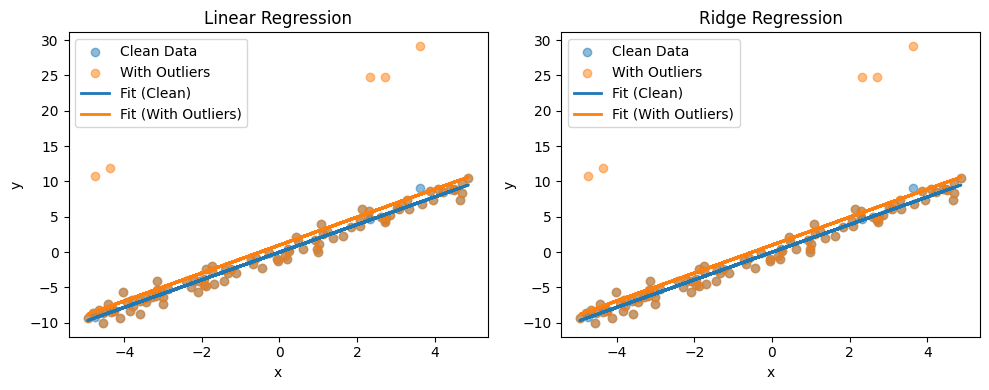

In [8]:
plt.figure(figsize=(10,4))

for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(1, 2, i)
    
    model.fit(X, y)
    preds_clean = model.predict(X)
    
    model.fit(X_out, y_out)
    preds_out = model.predict(X)
    
    plt.scatter(X, y, alpha=0.5, label="Clean Data")
    plt.scatter(X_out, y_out, alpha=0.5, label="With Outliers")
    
    plt.plot(X, preds_clean, label="Fit (Clean)", linewidth=2)
    plt.plot(X, preds_out, label="Fit (With Outliers)", linewidth=2)
    
    plt.title(name)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.savefig("../plots/exp3_outliers_shift.png", dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()


### Interpretation: Regression Shift

The presence of outliers causes the fitted regression line to shift substantially, even though only a small number of points were corrupted.

This demonstrates that linear regression is not robust to outliers, as the squared-error objective forces the model to prioritize fitting extreme values.


### Key Takeaway

Linear regression is highly sensitive to outliers due to its squared-error loss.
Regularization offers limited protection, as it does not change the underlying loss function.

This highlights the need for robust alternatives when data contamination is expected.
